In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the data
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
df_test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [5]:
# Size of the Train dataset
df_train.shape

(38932, 5)

In [6]:
# Size of the test dataset
df_test.shape

(29404, 4)

In [7]:
#checking for the null values
df_train.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

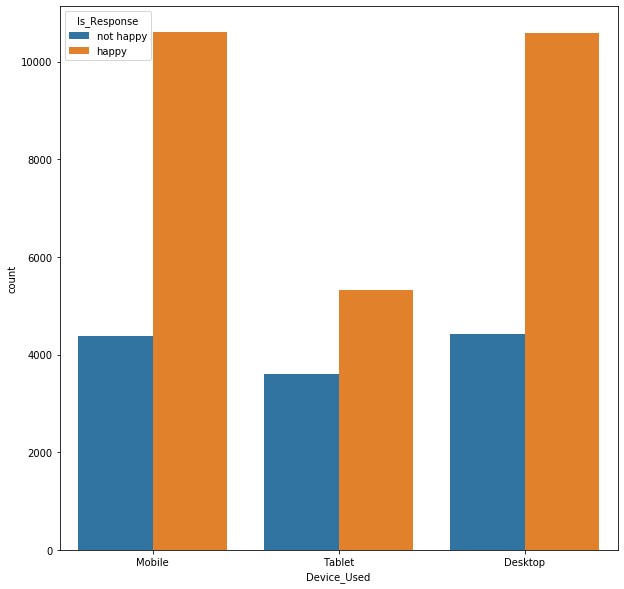

In [8]:
#Visualising the column Device Used using sns countplot
sns.set_font=1.0
fig=plt.subplots(figsize=(10,10))

sns.countplot(x='Device_Used',hue='Is_Response',data=df_train)

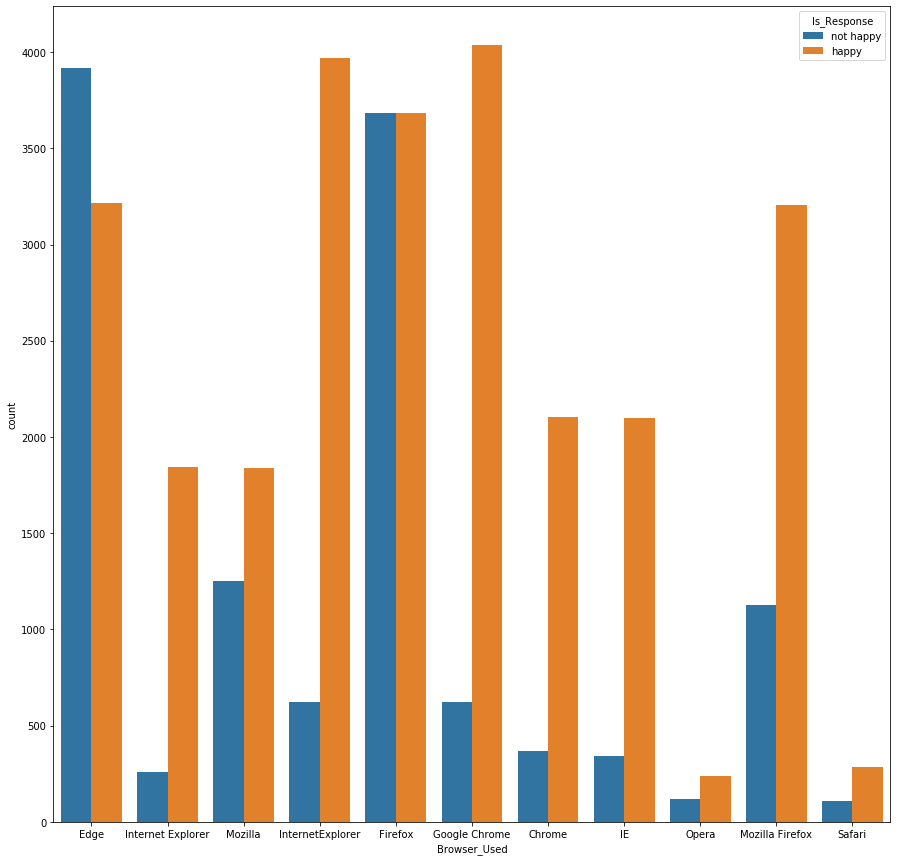

In [9]:
#Visualising the column Browser Used using sns countplot
fig=plt.subplots(figsize=(15,15))
sns.countplot(x='Browser_Used',hue='Is_Response',data=df_train)

In [10]:
#Mapping the values
title_mapping={'happy':'1','not happy':'0'}
df_train['Is_Response']=df_train['Is_Response'].map(title_mapping)



In [11]:
df_train['Is_Response'].value_counts()

1    26521
0    12411
Name: Is_Response, dtype: int64

In [12]:
df_train[df_train['Is_Response']=='0']

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,0
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,0
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,0
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,0
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,0
...,...,...,...,...,...
38923,id49249,I am pretty impartial to this hotel. I would d...,Edge,Mobile,0
38926,id49252,I tend to post reviews only when I’ve had an e...,Firefox,Desktop,0
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,0
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,0


In [13]:
# No Duplicate rows found
df_train[df_train.duplicated()]

,User_ID,Description,Browser_Used,Device_Used,Is_Response


In [14]:
df_train['Description'][1]

"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnervi

In [15]:
#Importing the libraries
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [16]:
#Converting all the strings to lower case
for i in range(0,len(df_train['Description'])):
    df_train['Description'][i]=df_train['Description'][i].lower()
for i in range(0,len(df_test['Description'])):
    df_test['Description'][i]=df_test['Description'][i].lower()
    
    

In [17]:
#Removing the Punctuations
import string
for i in range(0,len(df_train['Description'])):
    df_train['Description'][i]=df_train['Description'][i].translate(str.maketrans('','',string.punctuation))
for i in range(0,len(df_test['Description'])):
    df_test['Description'][i]=df_test['Description'][i].translate(str.maketrans('','',string.punctuation))
    

In [18]:
#Replacing the new line and commas with space
import re
df_train['Description']=df_train['Description'].str.replace('\n','').replace("'",'')
df_test['Description']=df_test['Description'].str.replace('\n','').replace("'",'')

In [19]:
df_test['Description'][8]

'unlike some hotels that grimace when you show up with a family rather than a solo business traveler the staff here went out of their way to help us the front desk staff graciously checked us in at noon the day we arrived the next day maureen the concierge suggested age appropriate activities and mapped out subway routes for us the amenities here are a big help too the refrigerator allowed us to store water and snacks and the kitchen table although small gave us a spot to park everyone rather than sitting on the beds we took advantage of the breakfast each morning the buffet offers good quality food and a big selection of hot and cold items everyone could find something they liked having a free breakfast saved us a lot of money'

In [20]:
df_train['Description'][3]

'stayed here with husband and sons on the way to an alaska cruise we all loved the hotel great experience ask for a room on the north tower facing north west for the best views we had a high floor with a stunning view of the needle the city and even the cruise ships we ordered room service for dinner so we could enjoy the perfect views room service dinners were delicious too you are in a perfect spot to walk everywhere so enjoy the city almost forgot heavenly beds were heavenly too'

In [21]:
#tokenizing the setences to words
from nltk.corpus import stopwords

for i in range(0,len(df_train['Description'])):
    df_train['Description'][i]=nltk.word_tokenize(df_train['Description'][i])

for i in range(0,len(df_test['Description'])):
    df_test['Description'][i]=nltk.word_tokenize(df_test['Description'][i])

           
        

In [22]:
#Using WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

In [23]:
stop_words=set(stopwords.words('english'))

In [24]:
#Adding these negative words which are removed in stopwords as it gives value to sentiments.
vocab={'very','until','too','no','not','only','nor','against'}
stop_words=stop_words.difference(vocab)

In [25]:
#cleaning the  dataset 
from nltk.corpus import stopwords
for i in range(0,len(df_train['Description'])):
    df_train['Description'][i]= [lemma.lemmatize(word) for word in df_train['Description'][i] if word not in stop_words]
for i in range(0,len(df_test['Description'])):
    df_test['Description'][i]= [lemma.lemmatize(word) for word in df_test['Description'][i] if word not in stop_words]

In [26]:
df_test['Description'][1]

['walking',
 'distance',
 'madison',
 'square',
 'garden',
 'penn',
 'subway',
 'station',
 'also',
 'very',
 'close',
 'lot',
 'retail',
 'store',
 'restaurant',
 'hotel',
 'offer',
 'free',
 'internet',
 'gym',
 'hot',
 'breakfast',
 'room',
 'top',
 'floor',
 'facing',
 'th',
 'st',
 'room',
 'clean',
 'staff',
 'very',
 'helpful',
 'accommodating',
 'downside',
 'ac',
 'making',
 'noise',
 'faucet',
 'bathroom',
 'loose',
 'thing',
 'easily',
 'fixed',
 'walked',
 'hotel',
 'madison',
 'square',
 'garden',
 'time',
 'square',
 'broadway',
 'everything',
 'considered',
 'definitely',
 'recommend',
 'hotel',
 'friend']

In [27]:
# Removing the duplicate values by using sets
for i in range(0,len(df_train['Description'])):
    df_train['Description'][i]=list(set(df_train['Description'][i]))
for i in range(0,len(df_test['Description'])):
    df_test['Description'][i]=list(set(df_test['Description'][i]))
        
    
    

In [28]:
df_test['Description'][1]

['also',
 'station',
 'free',
 'lot',
 'th',
 'close',
 'offer',
 'bathroom',
 'clean',
 'thing',
 'broadway',
 'loose',
 'breakfast',
 'everything',
 'distance',
 'subway',
 'definitely',
 'garden',
 'retail',
 'gym',
 'accommodating',
 'very',
 'walked',
 'internet',
 'fixed',
 'st',
 'floor',
 'staff',
 'noise',
 'easily',
 'downside',
 'facing',
 'friend',
 'hotel',
 'room',
 'restaurant',
 'store',
 'time',
 'penn',
 'considered',
 'walking',
 'recommend',
 'faucet',
 'helpful',
 'square',
 'top',
 'madison',
 'ac',
 'making',
 'hot']

In [29]:
#Removing the column as it imparts no value to dataset
df_train.drop(['User_ID'],axis=1,inplace=True)
df_test.drop(['User_ID'],axis=1,inplace=True)

In [30]:
#Removing the column as it imparts no value to dataset
df_train.drop(['Device_Used'],axis=1,inplace=True)
df_test.drop(['Device_Used'],axis=1,inplace=True)

In [31]:
#Removing the column as it imparts no value to dataset
df_train.drop(['Browser_Used'],axis=1,inplace=True)
df_test.drop(['Browser_Used'],axis=1,inplace=True)

In [32]:
df_train.head()

,Description,Is_Response
0,"[kind, free, clean, fussy, breakfast, too, not...",0
1,"[today, carpet, small, ice, work, door, channe...",0
2,"[find, mcpherson, breakfast, baby, small, look...",0
3,"[enjoy, heavenly, best, perfect, experience, n...",1
4,"[trash, extra, delivered, parking, plan, reque...",0


In [33]:
df_train['Description']=[" ".join(Description) for Description in df_train['Description'].values]
df_test['Description']=[" ".join(Description) for Description in df_test['Description'].values]

In [34]:
df_train['Description']

0        kind free clean fussy breakfast too nothing ve...
1        today carpet small ice work door channel knew ...
2        find mcpherson breakfast baby small look very ...
3        enjoy heavenly best perfect experience needle ...
4        trash extra delivered parking plan request ajo...
                               ...                        
38927    night two kind office sure desk clean breakfas...
38928    also sfo ill toast two de choose porridge very...
38929    carpet also people stained went waiting car sa...
38930    paid sure cheech lot heard experience blocking...
38931    wonderfully dame bed westin linen hotel restor...
Name: Description, Length: 38932, dtype: object

In [35]:
df_test['Description']

0        clock radio use aaa looking lot wakeup emblem ...
1        also station free lot th close offer bathroom ...
2        today happened joined supposed even true cool ...
3        linen one open bathroom need clean corrected h...
4        really desk close best quality everything clea...
                               ...                        
29399    breezewould recommending place patio river def...
29400    week car event close etc decent breakfast larg...
29401    night clean place problem quiet everything lar...
29402    total enjoyable thing best tell clean thanks e...
29403    book also really tubdrain every bathroom desk ...
Name: Description, Length: 29404, dtype: object

In [38]:
#splitting the data in test and train
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
X=df_train['Description']
Y=df_train['Is_Response']
X_train,x_test,Y_train,y_test = train_test_split(X,Y,random_state=42)

In [39]:
#Usong TFIDF Vectorizer to convert it into features
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


tf_vec = TfidfVectorizer()
clf = LogisticRegression()




In [40]:
#creating the pipeline
from sklearn.pipeline import Pipeline
model=Pipeline([('vectorizer',tf_vec),('classifor',clf)])
model.fit(X_train,Y_train)

predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))


C:\Users\habib\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[2336  760]
 [ 411 6226]]


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      3096
           1       0.89      0.94      0.91      6637

    accuracy                           0.88      9733
   macro avg       0.87      0.85      0.86      9733
weighted avg       0.88      0.88      0.88      9733



In [42]:
#using the trained model to predict the test data
y_pred=model.predict(df_test['Description'])

In [43]:
y_pred

array(['0', '1', '1', ..., '1', '1', '1'], dtype=object)

In [45]:
df_y=pd.DataFrame(y_pred,columns=['Is_Response'])

In [46]:
#Concatenating the database
df_new=pd.concat([df_test,df_y],axis=1)

In [47]:
df_new.head()

,Description,Is_Response
0,clock radio use aaa looking lot wakeup emblem ...,0
1,also station free lot th close offer bathroom ...,1
2,today happened joined supposed even true cool ...,1
3,linen one open bathroom need clean corrected h...,0
4,really desk close best quality everything clea...,1


In [48]:
df_new['Is_Response'].value_counts()

1    21028
0     8376
Name: Is_Response, dtype: int64

In [49]:
title_mapping={'1':'happy','0':'not happy'}
df_new['Is_Response']=df_new['Is_Response'].map(title_mapping)

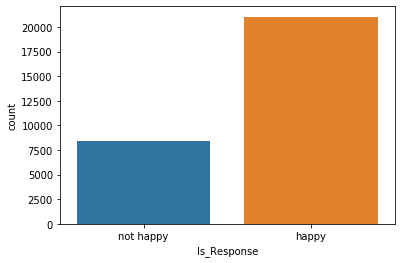

In [50]:
sns.countplot(x='Is_Response',data=df_new)